# (Ford GoBike System Data)
## by (Amira yousif mohamed)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
bikes=pd.read_csv('fordgobike.csv')

In [7]:
print(bikes.shape)
print(bikes.dtypes)
print(bikes.head(10))


(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

# cleaning and tidiness
Change names of some columns (bike_share_for_all_trip)

drop un useful columns for the analysis 'end_station_latitude', 'end_station_longitude','start_station_latitude','start_station_longitude'

Remove null values

split columns of start time to be time and data each in separated column

split columns of end time to be time and data each in separated column

add a column hold name of week for starting a trip

columns of "user type","gender" and "bike_share_for_all_trip" to be categorical

create column for age

In [8]:
#investigating and removing nan's 
bikes=bikes.dropna()

In [9]:
#selecting important columns and change thier names to be appropriate
# drop the following columns end_station_latitude	end_station_longitude start_station_latitude	start_station_longitude

bikes=bikes.drop(['end_station_latitude', 'end_station_longitude','start_station_latitude','start_station_longitude'], axis=1)


In [10]:
bikes.head()
print(bikes.shape)


(174952, 12)


In [11]:
#change name of bike_share_for_all_trip to be shorter
bikes=bikes.rename(columns={'bike_share_for_all_trip':'bike_share','duration_sec':'duration'})
#count values in categorical fields 
bikes.user_type.value_counts()
bikes.bike_share.value_counts()
bikes.head()

,duration,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [12]:
bikes['start_time']=bikes['start_time'].astype('datetime64')
bikes['end_time']=bikes['end_time'].astype('datetime64')
bikes['start_date']= bikes['start_time'].dt.date.astype('datetime64')
bikes['start_hour']=bikes['start_time'].dt.hour
bikes['end_date']= bikes['end_time'].dt.date.astype('datetime64')
bikes['end_hour']=bikes['end_time'].dt.hour
bikes['week_day']=bikes['start_time'].dt.day_name()
bikes['age']=2020-bikes['member_birth_year']
bikes['duration']=(bikes['duration']/60)
bikes.head()


,duration,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share,start_date,start_hour,end_date,end_hour,week_day,age
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,2019-02-28,17,2019-03-01,8,Thursday,36.0
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2019-02-28,12,2019-03-01,5,Thursday,48.0
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,2019-02-28,17,2019-03-01,4,Thursday,31.0
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,2019-03-01,0,Thursday,46.0
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,2019-02-28,23,2019-03-01,0,Thursday,61.0


In [13]:
bikes['user_type']=bikes['user_type'].astype('category')
bikes['bike_share']=bikes['bike_share'].astype('category')
bikes['member_gender']=bikes['member_gender'].astype('category')

In [14]:
bikes.shape

(174952, 18)

### What is the structure of your dataset?

> There are 174952 Trips in the dataset with 19 features ('duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'). Most variables are numeric , but the variables bike_share_for_all_trip,user_type
are categorical and start_station_name	end_station_name user_type are objects(names).
important note i changed the duration trip from seconds to minutes
### What is/are the main feature(s) of interest in your dataset?

>my feature of interest (trips in terms of week day) and (start hour )
i will try also to answer the following questions:
2-How long does the average trip
take?
3-Does the above depend on if a user
is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration,member_birth_year,member_gender,user_type,start_time,end_time

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

i will investigate the main feature of interest start hour and week days

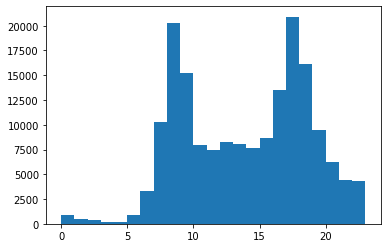

In [15]:
#distrbution of trips by start hours
bins=np.arange(0,bikes.start_hour.max()+1,1)
plt.hist(data=bikes,x='start_hour',bins=bins);


most trips are made between hours 5 and 17 and the peak hours are 8 am and 5 pm

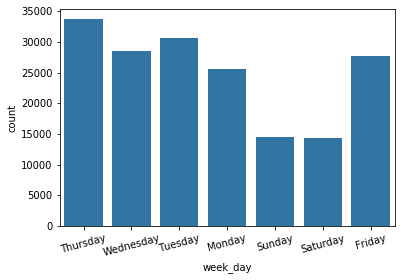

In [16]:

color=sb.color_palette()[0]
sb.countplot(data=bikes,x='week_day',color=color);
plt.xticks(rotation=15);

most of trips starts on thursday which is not a week end

next investigate trips taken in terms of user type(customer or subscriber)

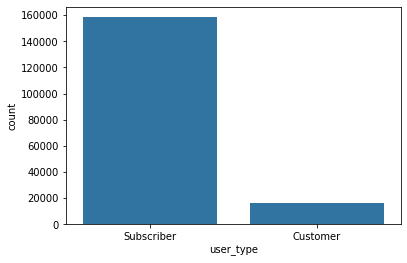

In [17]:
order=bikes.user_type.value_counts().index

sb.countplot(data=bikes,x='user_type',color=color,order=order);


the trip subscribers are much more than customers

next lets see members age

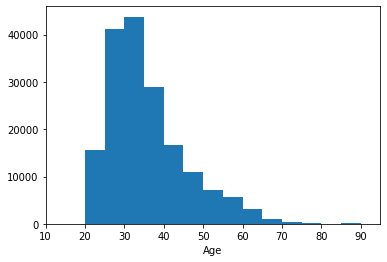

In [18]:
bins=np.arange(0,bikes.age.max()+5,5)
plt.hist(data=bikes,x='age',bins=bins);
plt.xlabel('Age')
plt.xlim(10,95);

in the graph of age distrbution we can see that most trips are taken by users between age of 25-40

next lets see statistics of gender


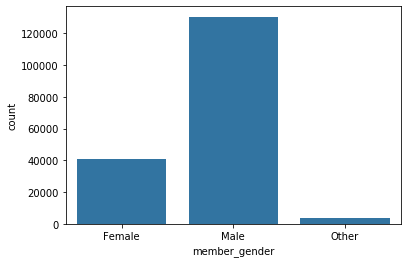

In [19]:
order=bikes.user_type.value_counts().index

sb.countplot(data=bikes,x='member_gender',color=color);

Males have the highest count of trips

next see member ship in bike share all trip

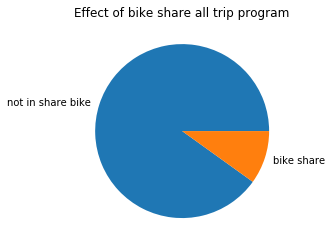

In [20]:
plt.pie(bikes.bike_share.value_counts(),labels=['not in share bike','bike share']);

plt.title('Effect of bike share all trip program');


the majority of bike riders are not in bike share all trip program

next investigate distrbution of trip  in minutes

11.733379060161425


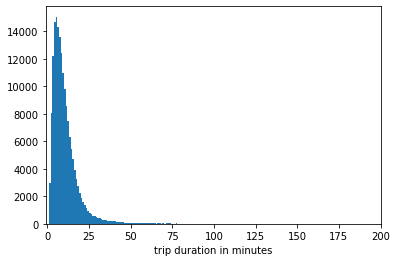

In [21]:
bins=np.arange(0,bikes.duration.max()+1,1);
plt.hist(data=bikes,x='duration',bins=bins);
plt.xlim(-1,200)
plt.xlabel('trip duration in minutes')
print(bikes.duration.mean())

most trips take about less than 25 minutes and the average of trip duration is 11 minutes, the distrbution of trip duration is highly left skewed

In [22]:
#bins=np.arange(0,bikes.duration_sec.max()+0.05,0.05);
#plt.hist(data=bikes,x='duration_sec',bins=bins);
#plt.xscale('log')
#ticks = [0.01,0.05, 0.1, 0.3, 0.5,1, 1.5]
#Convert ticks into string values, to be displaye dlong the x-axis
#labels = ['{}'.format(v) for v in ticks]
#plt.xticks(ticks, labels);
#plt.xlabel('Trip Duration in hours');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> my variables of interset are "day of the week as start of a trip" and "start hour" .it was bidominal distribution for both ,thursday was the highest trip day and hours after 5 and before 15 are the highest . i didn't perform any transformation on the feature of interest although ineeded to transform another field (trip duration) to get better understanding of data

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i did some tidiness converting column types of start and end time to date time also created new columns indicating start,end date only and start,end hour and a column for the start weekday. i also created column for the age of members
the trip duration was highly left skewed ,age were slightley left skewed which make sense as younger pepole are most likely tend to make bike trips.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [23]:
bikes.columns

Index(['duration', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender', 'bike_share',
       'start_date', 'start_hour', 'end_date', 'end_hour', 'week_day', 'age'],
      dtype='object')

In [24]:
numeric_vars = ['age', 'duration','start_hour']
categoric_vars = [ 'user_type', 'member_gender','bike_share','week_day']


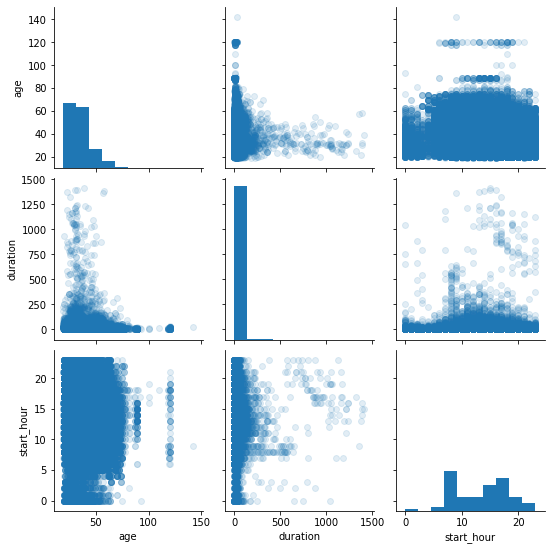

In [25]:
g = sb.PairGrid(data = bikes, vars = numeric_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter,alpha=1/8)

we can see that  Younger ages take longer trips so age and duration are negtively correlated
age and start hour seems to have no relation 
start hour and duration seem to have normal distrbution as duration gets higher in the middle of the day and the tend to be shorter at the end of the day


Let's move on to looking at how day of week correlate with other numeric features

<Figure size 720x720 with 0 Axes>

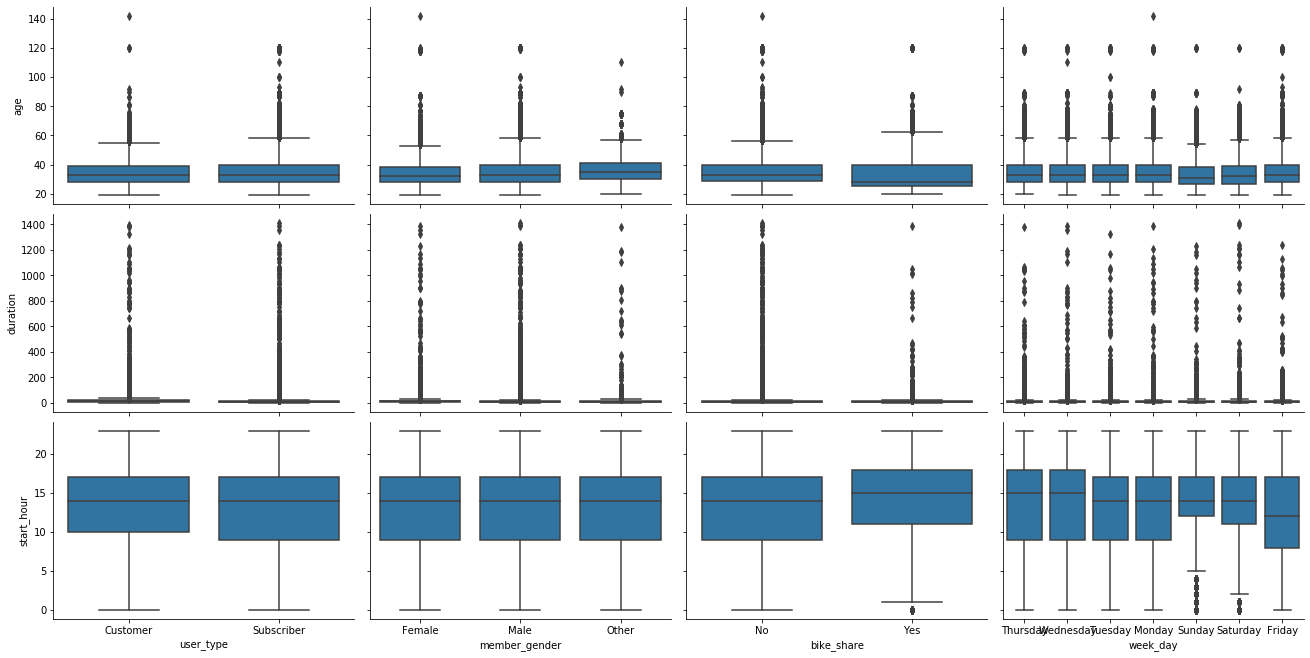

In [26]:
def boxgrid(x, y, **kwargs):
    
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = bikes, y_vars = ['age', 'duration','start_hour'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

i can see relations between:
    1-bike share program and age  younger pepole tend to participate in the program of bike share all trip
    2- member gender and age females under 40 are more than males
    3-start hours and week days seem to be correlated as in week days pepole use bike befor 10 till 17 and it get's lower in week ends (sunday and saturday)
    
 i can't investigate relation of week day and duration so i will do this in a separated plot next

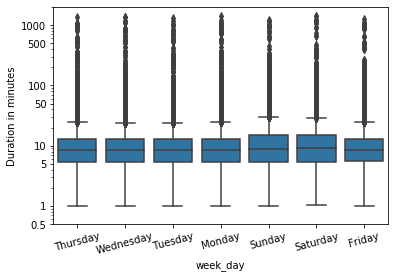

In [27]:
sb.boxplot(data=bikes,x='week_day',y='duration',color=color);
plt.yscale('log')
ticks = [0.5, 1, 5, 10, 50, 100, 500,1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
# Apply x-ticks
plt.yticks(ticks, labels);
plt.ylabel('Duration in minutes');
plt.xticks(rotation=15);

week days and duration  have a relation to be considered duration of trips gets longer during weekends sunday and saturday this can be due to pepole use bikes for sports or entertainment in the weekend

next let's see the relation of week days with other categorical features

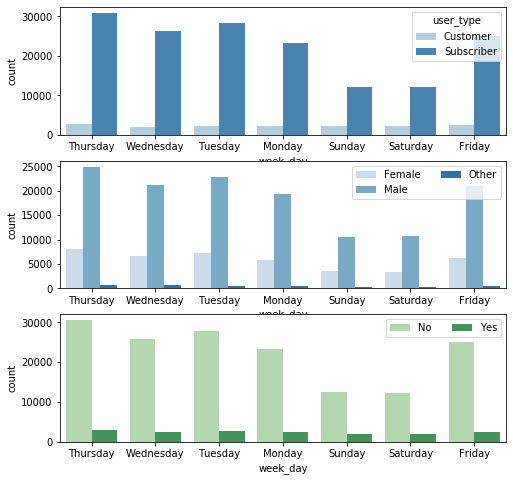

In [28]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: 
plt.subplot(3, 1, 1)
sb.countplot(data = bikes, x = 'week_day', hue = 'user_type', palette = 'Blues')

# subplot 2: 
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bikes, x = 'week_day', hue = 'member_gender', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: 
ax = plt.subplot(3, 1, 3)
sb.countplot(data = bikes, x = 'week_day', hue = 'bike_share', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) 
plt.show()

 week days peaks didn't change across the 3 categrical features as most trips made in thursday 

next i will see effect of age and week days

In [29]:
def format_boxes(x, y, title, xlabel, ylabel, **kwargs):
    plt.figure(figsize = [15,10])
    plt.title(title)
    
    sb.boxplot(data=bikes, x = x, y = y, color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

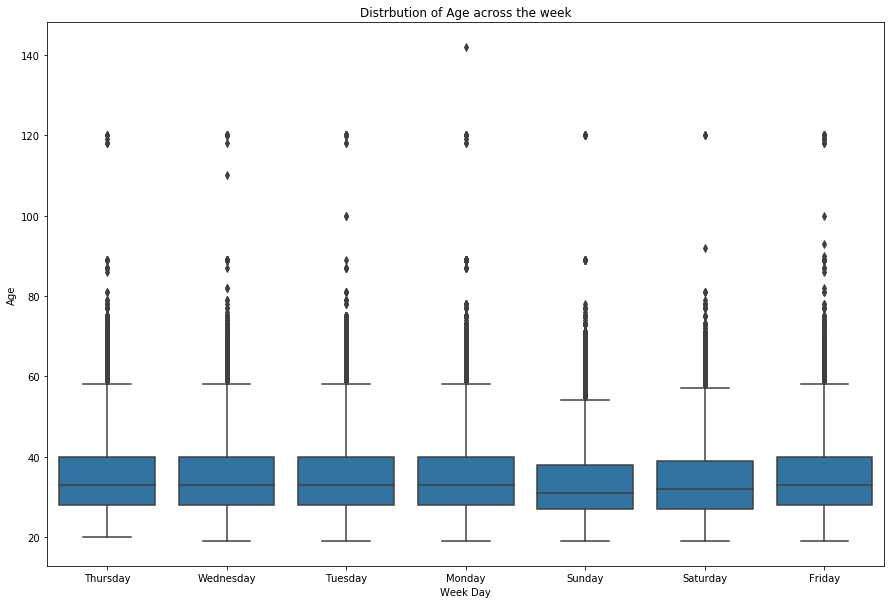

In [30]:
format_boxes(x='week_day',y='age',title='Distrbution of Age across the week',xlabel='Week Day',ylabel='Age')

according to age factor trip days tend to vary ,most of bike riders are younger than 40 , highest trip days are thrusdays,wednesdays tuesdays and mondays.still the weekend has lowest trip count

next investigate age vs gender

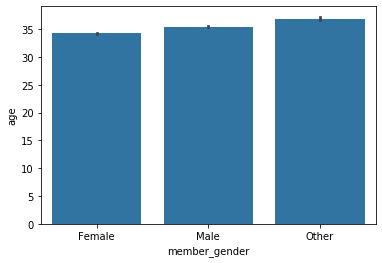

In [31]:
sb.barplot(data=bikes,x='member_gender',y='age',color=color);

i can see that most bikers are younger than 35 and pepole neglect mentioning thier gender

next week days and start hours

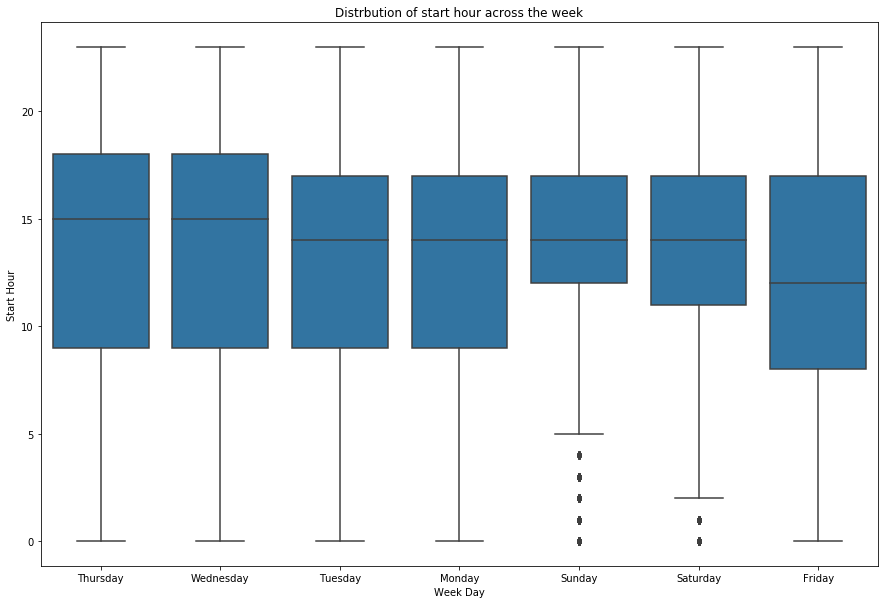

In [39]:
#sb.boxplot(data=bikes,x='week_day',y='start_hour',color=color);
format_boxes(x='week_day',y='start_hour',title='Distrbution of start hour across the week',xlabel='Week Day',ylabel='Start Hour')

i can see that start hour is affected by the week day on thursdays and wednesdays start hours are earlier  than rest of the week
now let look at the  age and user type

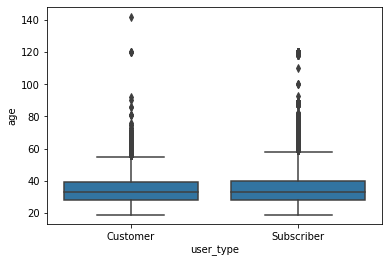

In [33]:
sb.boxplot(data=bikes,x='user_type',y='age',color=color);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> my key main feature was the week days trips and start hour i found they are not affected by gender or subscriptions still i see an effect of age across the weekdays trips. i had to transform the duration feature to get clear idea about the data
week days and duration  have a relation to be considered duration of trips gets longer during weekends sunday and saturday this can be due to pepole use bikes for sports or entertainment in the weekend



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1-bike share program and age have a relationship  younger pepole tend to participate in the program of bike share all trip
    2-females under 40 who take trips are more than males.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\amira\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text xticklabel objects>)

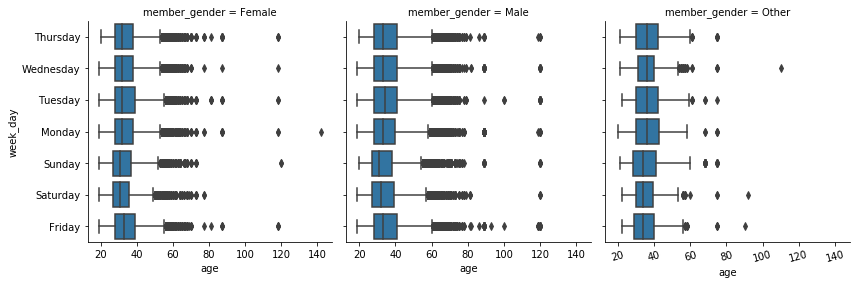

In [34]:
#age and week days with gender across facit grid

g = sb.FacetGrid(data = bikes, col = 'member_gender', height = 4)
g.map(sb.boxplot, 'age','week_day')
plt.xticks(rotation=15)

it's now more clear that males over 40 tend to have trips on friday,monday,wednesday and thursday
most of females who are biking are under 40 

next investigate week days across hours and age

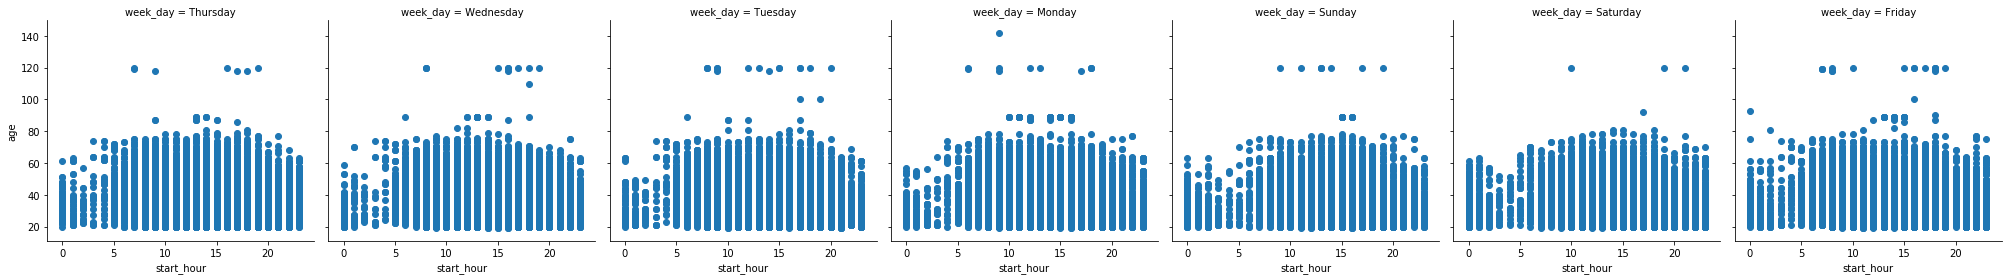

In [35]:
g = sb.FacetGrid(data = bikes, col = 'week_day', height = 4)
g.map(plt.scatter, 'start_hour','age',)


there's a slight effect of age across weekdays and start hour as the trips befor 5 am tend to vary between days as they are the lowest on thursday,wednesday , tuesday which contradicts with our finding that thursday is the peak day for the trips

next find the mean trip duration

In [36]:
bikes.duration.mean()

11.733379060161425

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  i found that start hour and week days can be affected by age and they also affect each other as starting hour varies according to weekdays

### Were there any interesting or surprising interactions between features?

>  i expected that trips will be highest in week ends but it wasn't so maybe students and employees use bike sharing to arrive to thier destination specialy that peak hours are during the day

C:\Users\amira\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


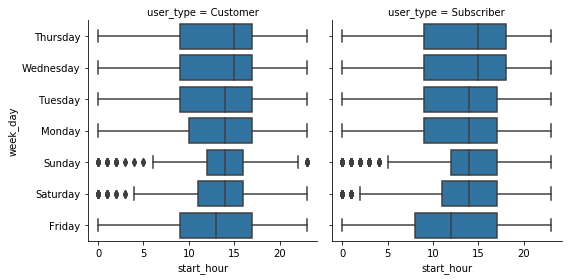

In [37]:
g = sb.FacetGrid(data = bikes, col = 'user_type', height = 4)
g.map(sb.boxplot, 'start_hour','week_day')


the distrbution of start hour and weekday are nearly the same in bot user type ,some slight diffrences in median of start hour in fridays ,sundays,wednesdays,thursdays between subscriber and customer maybe this small diffrences are due to low percentage of customer existence

In [ ]:
#! jupyter nbconvert Bikes_slides.ipynb --to slides --post serve --template output_toggle